In [18]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import os
from pathlib import Path
import requests
import json
from scipy.stats import linregress, pearsonr
import scipy.stats as st

In [19]:
#load files
usps_transit_time_2015 = os.path.join(".", "output", "usps_transit_time_2015.csv")
usps_transit_time_2016 = os.path.join(".", "output", "usps_transit_time_2016.csv")
usps_transit_time_2017 = os.path.join(".", "output", "usps_transit_time_2017.csv")
usps_transit_time_2018 = os.path.join(".", "output", "usps_transit_time_2018.csv")

#read data
usps_transit_time_2015_df = pd.read_csv(usps_transit_time_2015)
usps_transit_time_2016_df = pd.read_csv(usps_transit_time_2016)
usps_transit_time_2017_df = pd.read_csv(usps_transit_time_2017)
usps_transit_time_2018_df = pd.read_csv(usps_transit_time_2018)
usps_transit_time_2018_df


,Shipping Agent,country,year,period_number,avg_2018_transit_time,count
0,USPS,US,2018,1,3.07,4683
1,USPS,US,2018,2,3.06,4800
2,USPS,US,2018,3,2.96,3575
3,USPS,US,2018,4,2.97,3441
4,USPS,US,2018,5,2.79,4180
5,USPS,US,2018,6,2.56,4109
6,USPS,US,2018,7,2.53,3162
7,USPS,US,2018,8,2.34,3187
8,USPS,US,2018,9,2.39,3719
9,USPS,US,2018,10,2.49,3669


In [20]:
# Concatenate both DataFrames
combined_transit_time_df = pd.concat([usps_transit_time_2015_df, usps_transit_time_2016_df, usps_transit_time_2017_df, usps_transit_time_2018_df], ignore_index=True)
combined_transit_time_df.head()

,Shipping Agent,country,year,period_number,avg_2015_transit_time,count,avg_2016_transit_time,avg_2017_transit_time,avg_2018_transit_time
0,USPS,US,2015,1,NaN,1528,NaN,NaN,NaN
1,USPS,US,2015,2,NaN,2161,NaN,NaN,NaN
2,USPS,US,2015,3,NaN,1714,NaN,NaN,NaN
3,USPS,US,2015,4,NaN,1871,NaN,NaN,NaN
4,USPS,US,2015,5,NaN,2144,NaN,NaN,NaN


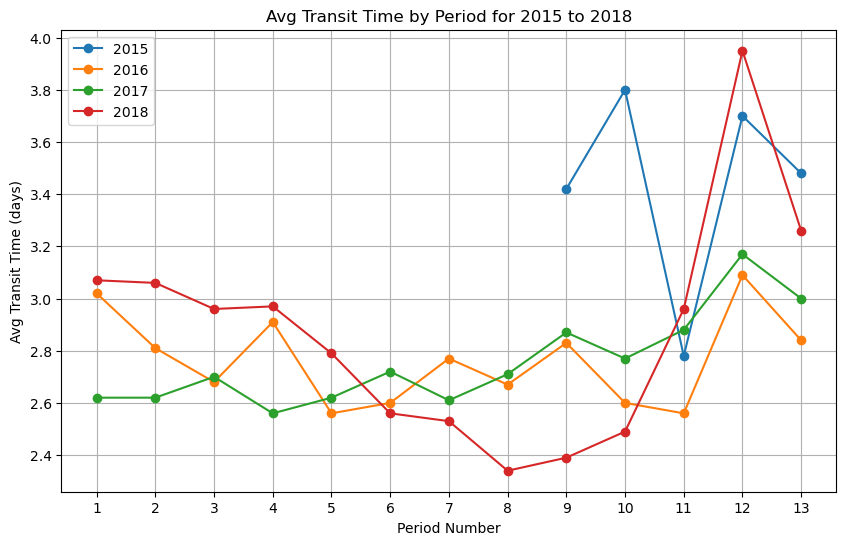

In [21]:
#plot average transit time from 2015 to 2018


#define a mapping of year to the avg_transit_time column
avg_transit_time_columns = {
    2015: "avg_2015_transit_time",
    2016: "avg_2016_transit_time",
    2017: "avg_2017_transit_time",
    2018: "avg_2018_transit_time"}

plt.figure(figsize=(10, 6))

#loop through each year and plot the data
for year, column in avg_transit_time_columns.items():
    subset = combined_transit_time_df[combined_transit_time_df["year"] == year]
    plt.plot(
        subset["period_number"],
        subset[column],
        marker="o",
        label=str(year))

#set x-axis ticks to show 1 through 13 for periods
plt.xticks(ticks=range(1, 14))

#add labels, title, legend, and grid
plt.title("Avg Transit Time by Period for 2015 to 2018")
plt.xlabel("Period Number")
plt.ylabel("Avg Transit Time (days)")
plt.legend()
plt.grid(True)
plt.show()



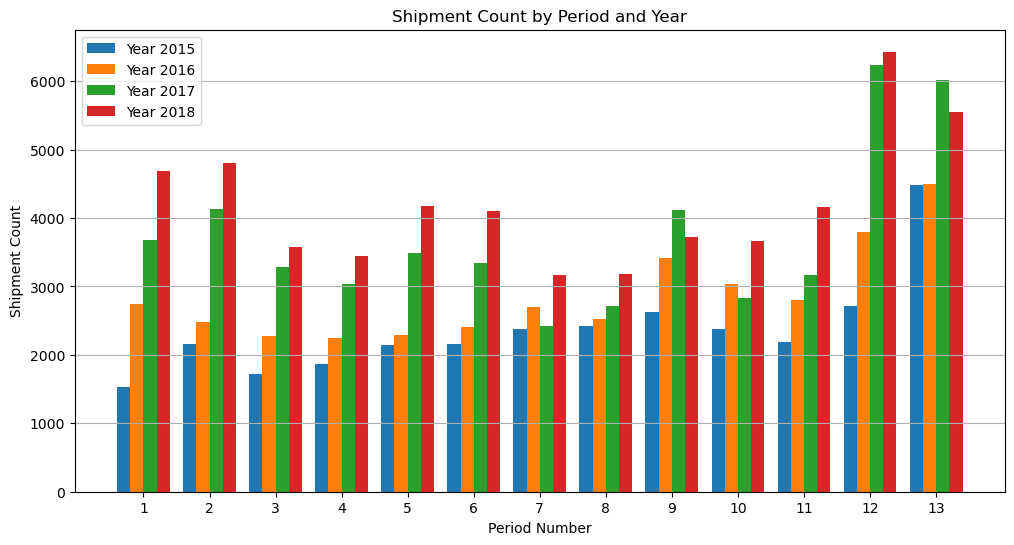

In [22]:
#create a bar plot for shipment count by period for each year


#increase figure width
plt.figure(figsize=(12, 6))

#add dictionary to define horizontal lines 
offsets = {2015: -0.3, 2016: -0.1, 2017: 0.1, 2018: 0.3}

#narrow bars to increase spacing 
bar_width = 0.2

#plot each year with a different offset
for year in combined_transit_time_df["year"].unique():
    subset = combined_transit_time_df[combined_transit_time_df["year"] == year]
    plt.bar(subset["period_number"] + offsets[year], subset["count"], width=bar_width, label=f"Year {year}")

#set x-axis ticks to show 1 through 13
plt.xticks(ticks=range(1, 14), labels=range(1, 14))

#add labels, title, legend, and grid
plt.title("Shipment Count by Period and Year")
plt.xlabel("Period Number")
plt.ylabel("Shipment Count")
plt.legend()
plt.grid(axis="y")
plt.show()

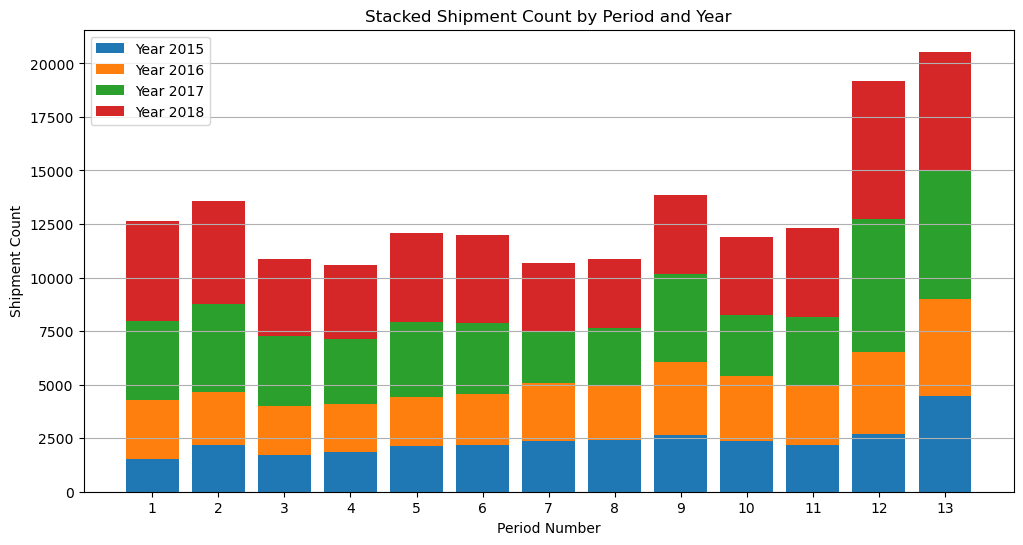

In [23]:
#sorted data by period and year
combined_transit_time_df = combined_transit_time_df.sort_values(by=["period_number", "year"])

#plot figure size 
plt.figure(figsize=(12, 6))

#name variables 
periods = combined_transit_time_df["period_number"].unique()
years = sorted(combined_transit_time_df["year"].unique())

#initialize an array to hold cumulative counts for stacking
cumulative_counts = np.zeros(len(periods))

#loop through each year and add to the stacked bar chart
for year in years:
    #get subset for the current year and align with periods
    subset = combined_transit_time_df[combined_transit_time_df["year"] == year]
    counts = subset.set_index("period_number").reindex(periods)["count"].fillna(0).values
    
    #plot the bar, adding to the cumulative count
    plt.bar(periods, counts, bottom=cumulative_counts, label=f"Year {year}")
    
    #update the cumulative count for stacking
    cumulative_counts += counts

#set x-axis ticks to only show 1 through 13
plt.xticks(ticks=range(1, 14), labels=range(1, 14))

#add labels, title, legend, and grid
plt.title("Stacked Shipment Count by Period and Year")
plt.xlabel("Period Number")
plt.ylabel("Shipment Count")
plt.legend()
plt.grid(axis="y")
plt.show()